Created on Tuesday 12 January 2021

**Group 5 - Classification  
New document prediction unsupervised unsupervised with t-SNE v1**

@authors : Alice Airault

We always want to detect new articles, i.e. documents that provide different information to others. To do this, we use the BoW provided by group 3 as a vector representation (as it was the one that obtained the best results in the first version).  
For this second method, we decided to carry out a size reduction with t-distributed Stochastic Neighbor Embedding (t-SNE) on our BoW. Then to apply one of the unsupervised algorithms used in the first part (LOF, Isolation Forest and One SVM).


# Import librairies

In [ ]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Create link between drive and notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import data

In [ ]:
# Create dataframe with BoW data of group 3
data_bow: pd.DataFrame = pd.read_json(
    "/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/g3_BOW_v1.json")

# Create dataframe that with BoW data
data = data_bow.copy()
data.drop(["art_id", "art_content_clean_without_lem"], axis=1, inplace=True)

# Functions

## Word cloud with its preprocessing

In [ ]:
# Clean data
def preprocessing(sentence: str) -> str:
    """Documentation
    Parameters:
        data: 1 column of a dataframe especially choose because we want a column who contain only text

    Out (if exists):
        liste_return: Liste of all the text of the dataframe return with preprocessing applied
    """
    stop_words: set = set(stopwords.words('french'))
    pattern: list = ['(', ')', ':', ';', ',', '&', '/',
                     '"', "'", '\n', '©', 'n°', '-']

    if not isinstance(sentence, str):
        sentence: str = str(sentence)

    sentence: str = re.sub(r'\d', ' ', sentence)

    sentence: str = sentence.lower()

    for d in pattern:
        sentence: str = sentence.replace(d, " ")

    token_words: list = word_tokenize(sentence)
    filtre: type = [w for w in token_words if not w in stop_words]

    final_list: str = ""
    for word in filtre:
        final_list: str = final_list + word + " "
    
    return(final_list)

In [ ]:
# Generates a word cloud for an article
def wordcloud_art(text: str):
    """Documentation
    Parameters:
        text: The article that will be show on the word cloud
    """
    text: str = preprocessing(text)
    if len(text) > 0:
        wordcloud: str = WordCloud(relative_scaling=1.0,).generate(str(text))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
        plt.close()
    else:
        print("The article have a size of 0.")

## Visualization 2D or 3D

In [ ]:
def graphs(data: np.ndarray, view: str = '2d'):
    """Documentation
    Parameters:
        data: the t-SNE array
        view: graph in '2d' or '3d'
    Output:
        model representation in 2d or 3d 
    """
    # Prediction
    data_plot: pd.DataFrame = pd.DataFrame(data)
    data_plot["prediction"] = pred
    data_plot["pred"] = data_plot["prediction"].apply(
        lambda x: 'Old' if x == 1 else 'New')

    # Color chart
    data_plot_new: pd.DataFrame = data_plot[data_plot["pred"] == "New"]
    data_plot_old: pd.DataFrame = data_plot[data_plot["pred"] == "Old"]

    # Chart
    if view == '2d':
        fig = px.scatter(data_plot, x=0, y=1, color='pred', opacity=0.6)
    elif view == '3d':
        fig = px.scatter_3d(data_plot, x=0, y=1, z=2,
                            color='pred', opacity=0.6)
    fig.show()

# Dimension reduction with t-SNE

In [ ]:
# Normalisation
sc: StandardScaler = StandardScaler()
X: np.ndarray = sc.fit_transform(data)

# t-SNE
tsne: TSNE = TSNE(n_components=3)
X: np.ndarray = tsne.fit_transform(X)

# Models

## 1) Local Outlier Facor (LOF)

In [ ]:
# Prediction BoW-G3 with LOF
clf: LocalOutlierFactor = LocalOutlierFactor(n_neighbors=2, contamination=0.1)
pred: np.ndarray = clf.fit_predict(X)
pd.Series(pred).value_counts()

 1    6779
-1     754
dtype: int64

In [ ]:
graphs(X, '2d')

In [ ]:
graphs(X, '3d')

## 2) One Support Vector Machine (One SVM)

In [ ]:
# Prediction BoW-G3 with One SVM
one_svm: OneClassSVM = OneClassSVM(gamma='auto', nu=0.03).fit(data)
pred: np.ndarray = one_svm.predict(data)
score: np.ndarray = one_svm.decision_function(data)
pd.Series(pred).value_counts()

 1    7305
-1     228
dtype: int64

In [ ]:
graphs(X, '2d')

In [ ]:
graphs(X, '3d')

## 3) Isolation Forest

In [ ]:
# Prediction BoW-G3 with Isolation Forest
clf: IsolationForest = IsolationForest(random_state=0, contamination=0.01)
pred: np.ndarray = clf.fit_predict(X)
score: np.ndarray = clf.decision_function(X)
pd.Series(pred).value_counts()

 1    7457
-1      76
dtype: int64

In [ ]:
graphs(X, '2d')

In [ ]:
graphs(X, '3d')

In [ ]:
# Prediction BoW-G3 with Isolation Forest
clf: IsolationForest = IsolationForest(random_state=0, contamination=0.003)
pred: np.ndarray = clf.fit_predict(X)
score: np.ndarray = clf.decision_function(X)
pd.Series(pred).value_counts()

 1    7510
-1      23
dtype: int64

In [ ]:
graphs(X, '2d')

In [ ]:
graphs(X, '3d')

# Word cloud for Isolation forest (because best results just before)

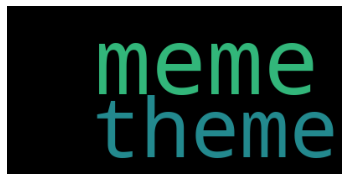

meme theme
None


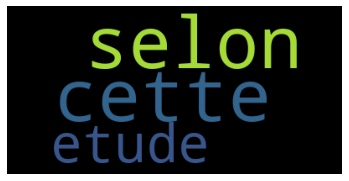

selon cette etude
None


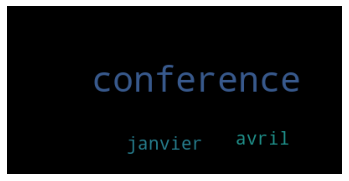

conference janvier conference avril
None


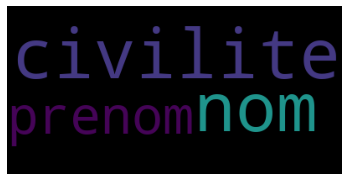

civilite nom prenom
None


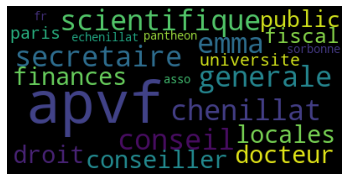

secretaire generale conseil scientifique emma chenillat conseiller finances locales apvf docteur droit public fiscal universite paris pantheon sorbonne echenillat apvf asso fr
None


In [ ]:
# Create a new dataframe with the score
df = data.copy()
df['index'] = data.index
df['score'] = score

# Retrieve the text of the articles
mycolumns = ['art_id', 'art_content_clean_without_lem']
data_bow = data_bow[mycolumns]

# Merge the text with its decision score
df_new = pd.merge(data_bow, df, left_on='art_id', right_on='index')

# Sort scores from smallest to largest
df_sort = df_new.sort_values(by='score')
df_sort = df_sort.reset_index()
df_sort = df_sort.drop(['level_0'], axis=1)

# Display the first 5 most different texts and word clouds
for i in range(5):
    txt = df_sort['art_content_clean_without_lem'][i]
    wordcloud = wordcloud_art(txt)
    print(txt)
    print(wordcloud)

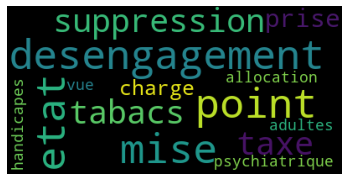

desengagement etat mise point suppression taxe tabacs prise charge psychiatrique allocation adultes handicapes vue
None


In [ ]:
# One text and its word cloud
txt = df_sort['art_content_clean_without_lem'][20]
wordcloud = wordcloud_art(txt)
print(txt)
print(wordcloud)

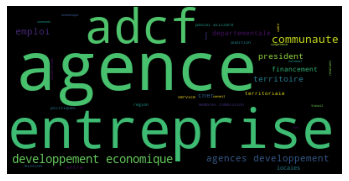

reunie jeudi mars commission developpement economique emploi adcf debattu presence pascal allizard president conseil national economies regionales cner relations entre communautes agences developpement membres commission echange missions financement gouvernance agences nouveau contexte reformes institutionnelle fiscale reinscription territorialisation politiques emploi agenda prochaine legislature figurait egalement ordre jour reunion invitation adcf commission developpement economique emploi pascal allizard photo president conseil national economies regionales cner vice president conseil general calvados president communaute communes conde noireau presente missions assumees agences developpement pris part debat avenir outils notamment evoquees formes gouvernance statuts missions agences developpement economique metiers champs intervention partage roles communautes plus value agences developpement relations entreprises territoires reconfigurations actuelles possibles agences developpem

In [ ]:
# One text and its word cloud
txt = df_sort['art_content_clean_without_lem'][33]
wordcloud = wordcloud_art(txt)
print(txt)
print(wordcloud)

# Result for a t-SNE of 128 dimension

In [ ]:
df_x: pd.DataFrame = pd.read_csv(
    "/content/drive/My Drive/G5 Inter-Promo 2021/Données/Output/Doublons/X_Ncomponents_128.csv")
df_x.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0,-0.093392,-0.173249,-0.030164,-0.221936,0.080819,-0.111201,-0.689377,-1.237082,0.163082,0.018343,-0.164520,0.084782,0.420187,0.022905,0.242661,0.103610,0.232676,-0.239056,0.194805,0.233067,-0.042408,0.298758,0.056627,-0.628041,-0.165814,-0.099932,0.096432,-0.007619,0.035687,-0.688920,0.471225,0.047821,0.288907,-0.376799,-0.011532,-0.118455,1.078428,0.004525,-0.001229,...,0.120385,-0.094784,-0.227434,-0.170360,-0.106784,0.556123,-0.167748,-0.072325,-0.037538,-0.032797,-0.120143,0.312160,-0.343609,-0.500590,0.686991,0.769069,-0.543764,0.318711,-0.298440,1.045886,-0.224384,0.111007,0.334909,-0.206693,-0.039039,-0.102852,-0.566847,-0.516881,0.559180,0.239880,-0.056475,-0.271386,0.004901,0.159202,0.048482,-0.037488,0.194267,-0.431514,0.642962,0.596491
1,1,-0.036324,0.058548,-0.055203,0.011506,0.040759,1.695987,0.152760,-0.174940,-0.015808,0.061724,0.039374,-0.196090,0.046493,-0.042397,-0.118948,-0.001272,-0.095463,0.166151,-0.120695,0.154074,0.064884,-0.102759,0.021861,0.425027,-0.053043,-0.083450,0.043289,-0.030927,0.058224,0.085175,0.602543,0.029785,0.480793,0.216701,0.312543,-0.334602,-0.071716,-0.007493,-0.033666,...,0.009609,0.038471,-0.577564,-0.041243,0.092210,2.318397,0.084253,0.024459,0.051116,-0.109247,-0.025513,-1.127854,0.374688,0.062223,-0.117960,0.275489,0.054328,-0.109768,-0.075380,-0.045760,0.025570,-0.077439,-0.231912,0.970467,-0.105596,-0.001891,0.018705,-0.177222,-0.205766,-0.215829,-0.035107,-0.062919,-0.011909,-0.099045,-0.075852,-0.495478,-0.119602,0.087933,-0.252565,-0.008129
2,2,0.137965,-0.257171,-0.033816,1.377575,0.245086,0.046986,0.049662,0.113388,-0.019064,-0.020901,-0.108081,0.175711,0.151691,0.224663,0.842997,0.272337,0.022978,-0.255725,-0.069850,0.092389,-0.016730,0.008770,0.012039,-0.127064,-0.022164,0.035684,-0.108863,-0.085512,0.022454,-1.026649,0.540966,0.035234,0.830284,-0.052133,0.401121,-0.110305,0.051367,0.008247,0.060485,...,-0.085261,0.420641,0.164195,-0.020332,-0.015076,0.073342,-0.219614,0.029996,0.938649,0.547729,-0.028015,-0.080957,-0.040586,0.422846,-0.105938,0.000852,0.011930,-0.018056,-0.271464,0.052511,-0.132594,-0.002290,-0.112892,1.040551,-0.081219,0.009904,0.005103,-0.111373,-1.115752,0.493231,-0.072606,-0.086400,-0.203144,-0.013731,-0.154450,-0.071719,0.127177,-0.090426,1.081948,-0.035127
3,3,-0.029856,0.324976,-0.076753,0.030058,-0.000109,-0.048060,-1.108587,-0.828359,-0.200002,0.004737,0.060801,0.004483,1.154734,-0.016458,0.453258,-0.344958,0.025804,0.343835,-0.082644,0.009585,-0.029007,-0.449078,-0.007370,0.239305,0.270797,0.263928,0.037880,0.061532,0.181876,0.117258,-0.341171,0.199054,0.114582,-0.193977,-0.214188,0.243121,0.270426,-0.004304,-0.030236,...,0.009770,-0.005562,1.006467,0.028748,-0.081100,0.628599,0.240006,-0.004306,-0.007954,-0.122624,0.009437,-0.553814,-0.575179,0.015172,-1.314126,1.786338,0.490077,0.536509,0.110229,0.132564,0.055370,0.074782,0.190722,-0.281209,-0.381509,0.002517,-0.033121,-0.521799,-0.073933,0.518995,-0.000908,0.805155,-0.020271,-0.007904,-0.113284,0.256448,0.132323,0.046040,-0.228667,0.382992
4,4,0.031374,0.184088,0.017415,0.152368,-0.368940,-0.044269,-0.673822,-0.558631,0.096743,0.012890,0.073234,0.074458,1.189296,-0.084559,0.247588,-0.299930,0.028534,-0.065280,0.113356,0.129747,-0.586409,-1.187918,-0.193784,1.779448,1.084553,0.368510,0.119711,-0.094630,-0.125988,-0.444406,-0.084430,-0.018961,1.191259,1.334768,-0.022623,-0.122743,-0.038545,-0.007838,-0.007477,...,0.250264,-0.008426,0.632033,0.216476,-0.084305,0.697289,0.018421,-0.093905,0.210230,0.210927,0.012908,-0.276545,-0.436753,-0.021519,-1.351385,1.001380,-0.037224,0.371213,0.402341,-0.249671,0.180985,0.090094,0.345135,0.085016,-0.751078,-0.006649,-0.135114,0.376476,-0.282089,0.153502,-0.006049,0.211800,-0.051315,-0

In [ ]:
df_x.drop("Unnamed: 0", axis=1)
x_128 = df_x.values

In [ ]:
graphs(x_128, '2d')

In [ ]:
graphs(x_128, '3d')